다음은 철수네 동물병원에 치료 받을 개의 종류와 그 크기 데이터이다. 이 데이터를 바탕으로 k-NN 알고리즘을 적용해보자

#5.1. 각 견종별 데이터를 2차원 배열로 만들어서 출력하라

In [125]:
doc = [[75,24],[77,29],[83,19],[81,32],[73,21],[99,22],[72,19],[83,34]]
sam = [[76,55],[78,58],[82,53],[88,54],[76,61],[83,52],[81,57],[89,64]]
mal = [[35,23],[39,26],[38,19],[41,30],[30,21],[57,24],[41,28],[35,20]] 
X = doc + sam + mal
y = [0]*len(doc) + [1]*len(sam) + [2]*len(mal)
X  , y

([[75, 24],
  [77, 29],
  [83, 19],
  [81, 32],
  [73, 21],
  [99, 22],
  [72, 19],
  [83, 34],
  [76, 55],
  [78, 58],
  [82, 53],
  [88, 54],
  [76, 61],
  [83, 52],
  [81, 57],
  [89, 64],
  [35, 23],
  [39, 26],
  [38, 19],
  [41, 30],
  [30, 21],
  [57, 24],
  [41, 28],
  [35, 20]],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

#5.2. k가 3일때 혼동행렬로 표시하라

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화
knn = KNeighborsClassifier(n_neighbors=3)

# 모델 학습
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 출력
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 1.0
Confusion Matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 2]]


In [127]:
# 모델 초기화
knn = KNeighborsClassifier(n_neighbors=7)

# 모델 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#5.3.다음과 같은 개의 길이 높이 데이터  A, B, C, D에 대하여 각각 k를 3,5,7로 하여 분류하고 그 결과를 출력하라.
각각 [길이, 높이]이다.
- A: [58, 30]
- B: [80, 26]
- C: [80, 41]
- D: [75, 55]

In [116]:
doc = [[75,24],[77,29],[83,19],[81,32],[73,21],[99,22],[72,19],[83,34]]
sam = [[76,55],[78,58],[82,53],[88,54],[76,61],[83,52],[81,57],[89,64]]
mal = [[35,23],[39,26],[38,19],[41,30],[30,21],[57,24],[41,28],[35,20]] 
X = doc + sam + mal
y = [0]*len(doc) + [1]*len(sam) + [2]*len(mal)
X  , y

X_test1 = [[58,30],[80,26],[80,41],[75,55]]
k = [3, 5, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(f'{i}: {knn.predict(X_test1)}')

3: [2 0 0 1]
5: [2 0 0 1]
7: [2 0 1 1]


In [117]:
import matplotlib.pyplot as plt

#5.5. 5.3번 데이터를 산포도 그래프로 그려서 다음과 같이 A, B, C, D데이터를 나타내어 보자

[[75, 24], [77, 29], [83, 19], [81, 32], [73, 21], [99, 22], [72, 19], [83, 34]]


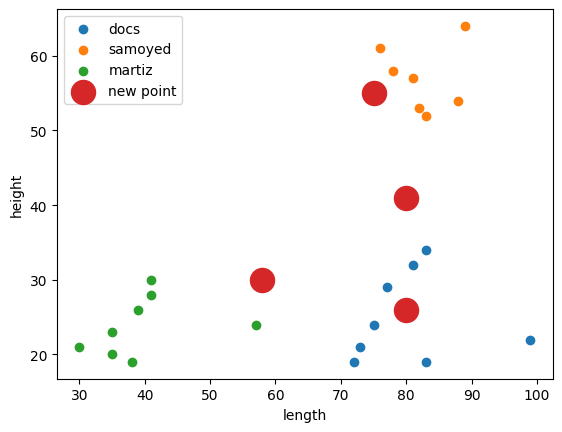

In [118]:
print(doc)
import numpy as np
X_test1 = [[58,30],[80,26],[80,41],[75,55]]

n_d = np.array(doc).T
n_s = np.array(sam).T
n_m = np.array(mal).T
new_p = np.array(X_test1).T

plt.scatter(n_d[0],n_d[1])
plt.scatter(n_s[0],n_s[1])
plt.scatter(n_m[0],n_m[1])
plt.scatter(new_p[0], new_p[1],300)

plt.legend(['docs','samoyed','martiz','new point'])
plt.xlabel('length')
plt.ylabel('height')
plt.show()

#5.6. 원래 데이터와 A,B,C,D 데이터를 모두 포함한 dog_data를 만들도록 하자. 이 때 데이터가 가진 모든 레이블을 삭제하고 k-평균 알고리즘을 적용하여 클러스터링을 수행하고, 다음과 같이 k가 2,3,4일때 수행결과를 시각화해보자

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]


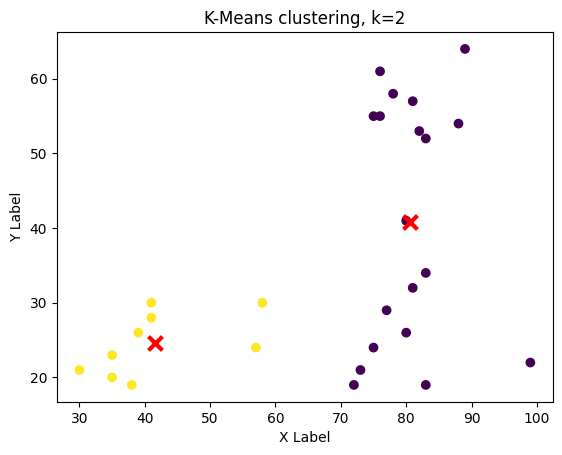

In [128]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.array(doc + sam + mal + X_test1)

# KMeans 객체 생성
kmeans = KMeans(n_clusters=2, random_state=0)

# k-means 클러스터링 수행
kmeans.fit(X)

# 클러스터링 결과 확인
print(kmeans.labels_)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, linewidths=3, color='r', zorder=10)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('K-Means clustering, k=2')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 0 0]


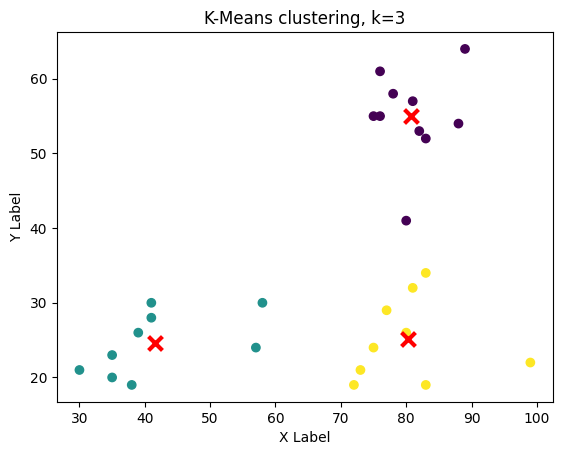

In [129]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.array(doc + sam + mal + X_test1)

# KMeans 객체 생성
kmeans = KMeans(n_clusters=3, random_state=0)

# k-means 클러스터링 수행
kmeans.fit(X)

# 클러스터링 결과 확인
print(kmeans.labels_)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, linewidths=3, color='r', zorder=10)
plt.title('K-Means clustering, k=3')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 1 1 1 1 1 3 1 1 3 0 2 2]


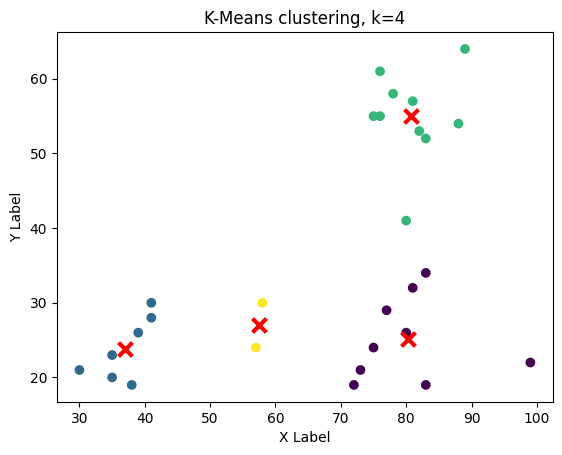

In [130]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.array(doc + sam + mal + X_test1)

# KMeans 객체 생성
kmeans = KMeans(n_clusters=4, random_state=0)

# k-means 클러스터링 수행
kmeans.fit(X)

# 클러스터링 결과 확인
print(kmeans.labels_)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, linewidths=3, color='r', zorder=10)
plt.title('K-Means clustering, k=4')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()